In [1]:
'''
This file reads json file in project/hand_pose/Annotation.json and output project/hand_pose/hand_label.csv
'''

'\nThis file reads json file in project/hand_pose/Annotation.json and output project/hand_pose/hand_label.csv\n'

In [2]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET
import json
from pprint import pprint
from matplotlib import pyplot as plt
from PIL import Image
import sys
import numpy as np
import matplotlib.patches as patches
import cv2
import pandas as pd
import warnings
from config import FLAGS
warnings.simplefilter("ignore")

In [3]:
tensorflow_path = "phase1_models"
sys.path.append(tensorflow_path + "/research")
sys.path.append(tensorflow_path + "/research/object_detection")
sys.path.append(tensorflow_path + "/research/object_detection/utils")
from utils import label_map_util
from utils import visualization_utils as vis_util

In [4]:
base_dir = "../hand_pose"
json_file = os.path.join(base_dir, 'annotation.json')
csv_file = os.path.join(base_dir, 'hand_labels.csv')
segment_length = FLAGS.padding
image_dir = os.path.join(base_dir, 'Color') # Color is a tiny dataset folder for script test

In [5]:
#image names, with suffix like '.jpg' at the end
img_list = os.listdir(image_dir)

In [6]:
#eliminate ".jpg"
img_name = [img[:-4] for img in img_list]

In [7]:
#load the annotation.json
with open(json_file) as f:
    data = json.load(f)
pprint(f)

<_io.TextIOWrapper name='../hand_pose/annotation.json' mode='r' encoding='UTF-8'>


In [8]:
len(img_list) # a tiny dataset for script test

111

In [9]:
# paint the boundary on an image
def paint_boundary(index):
    img = cv2.imread(os.path.join(image_dir,img_list[index]))
    if img_name[index]+"_L" in data:
        pos = record_boundary(index, "_L")
        img = cv2.rectangle(img, pos[0], pos[1] , (0, 255, 0), 3) #(row['xmin'], row['ymin']), (row['xmax'], row['ymax'])
    if img_name[index]+"_R" in data:
        pos = record_boundary(index, "_R")
        img = cv2.rectangle(img, pos[0], pos[1] , (0, 255, 0), 3) #(row['xmin'], row['ymin']), (row['xmax'], row['ymax'])     
    return img

In [10]:
# training data
def record_boundary(index, direction):
    name = img_name[index]+direction
    xy = np.array(data[name])
    x_arr = xy[:,0]
    y_arr = xy[:,1]
    segment_length = 20
    x_max = max(x_arr) + segment_length
    y_max = max(y_arr) + segment_length
    x_min = min(x_arr) - segment_length
    y_min = min(y_arr) - segment_length
    return [(int(x_min), int(y_min)), (int(x_max), int(y_max))]


In [11]:
def return_value(index, direction):
    pos = record_boundary(index, direction)
    xmin = pos[0][0]
    ymin = pos[0][1]
    xmax = pos[1][0]
    ymax = pos[1][1]
    value = (img_name[index]+'.jpg', #+direction,
             xmax-xmin,
             ymax-ymin,
             'hand',
             xmin,
             ymin,
             xmax,
             ymax
             )
    return value

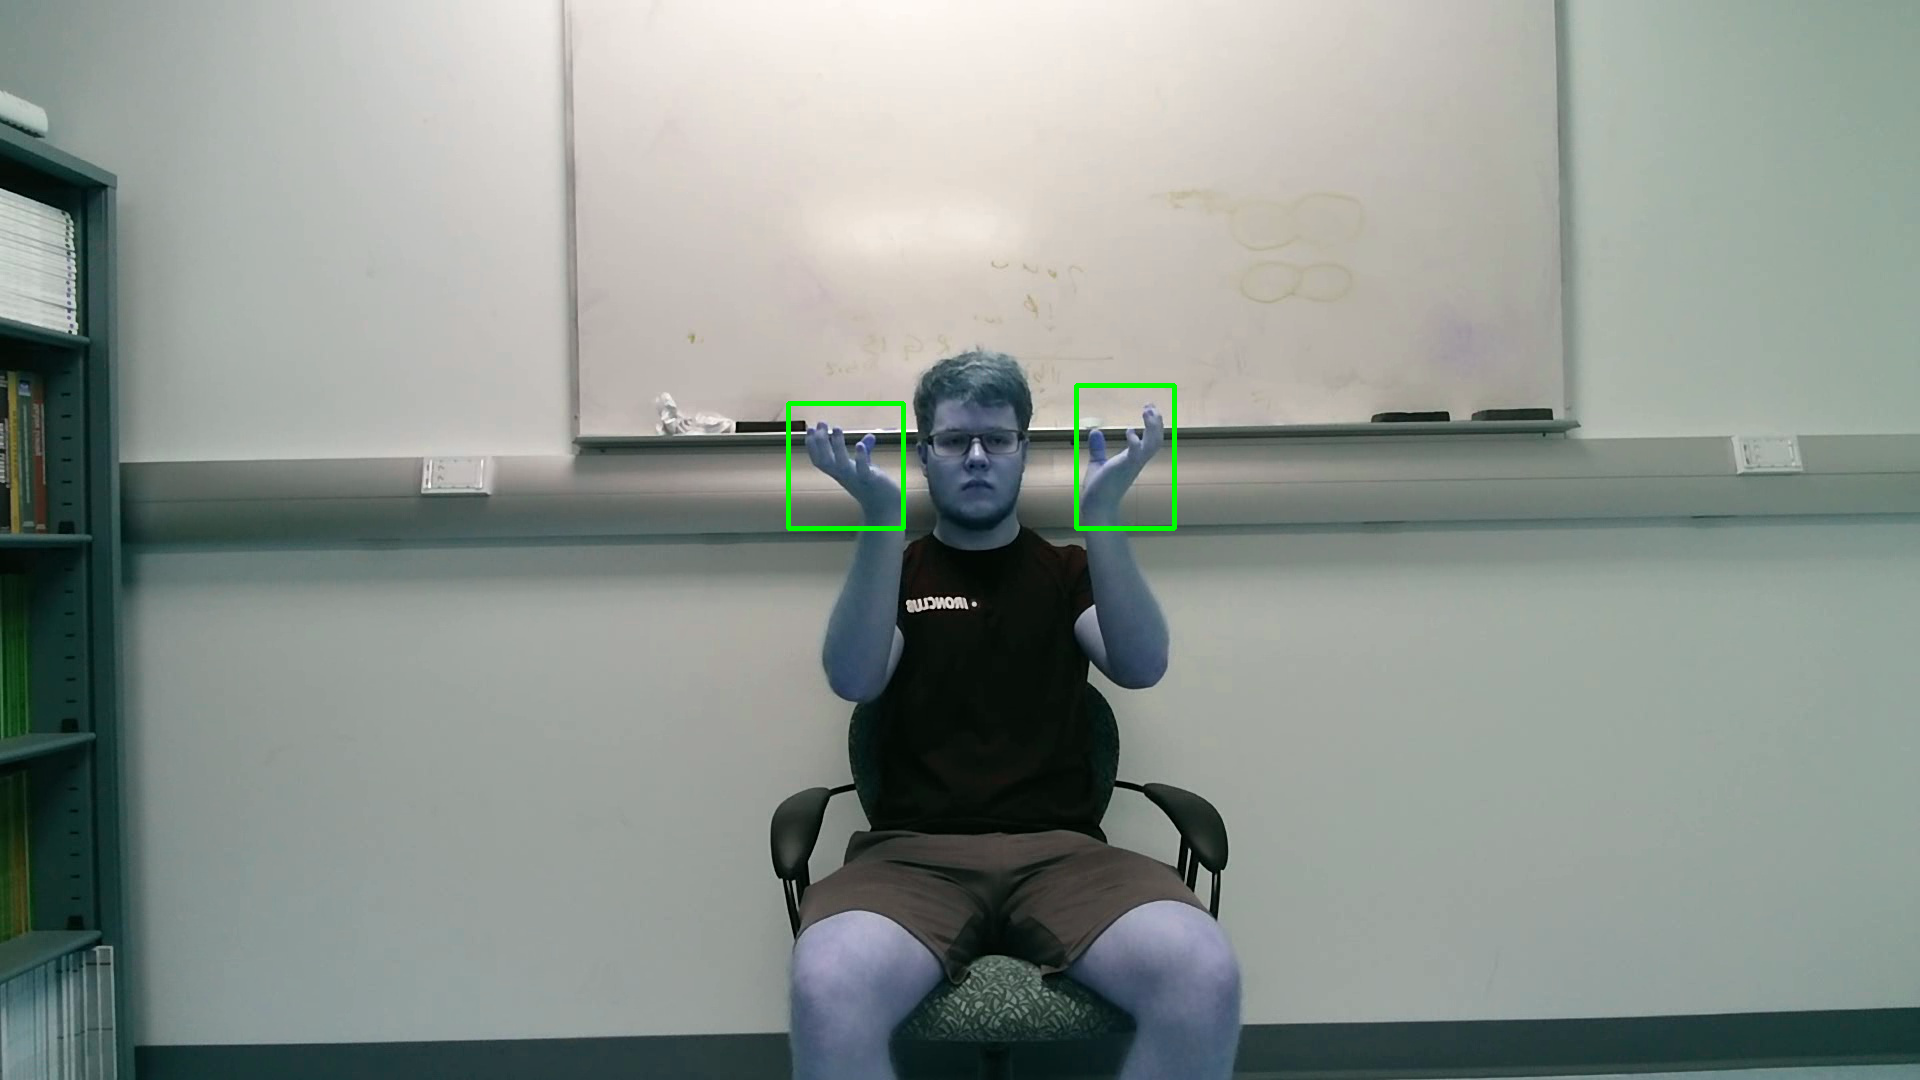

In [12]:
Image.fromarray(paint_boundary(10))

In [13]:
xml_list = []
#for xml_file in glob.glob(path + '/*.xml'):
for index, img in enumerate(img_name):
    if img + '_R' in data:
        xml_list.append(return_value(index, '_R'))
    if img + '_L' in data:
        xml_list.append(return_value(index, '_L'))
column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
xml_df = pd.DataFrame(xml_list, columns=column_name) #use panda
#print(xml_df)

In [14]:
len(xml_list)

154

In [15]:
xml_df.to_csv(csv_file, index=None)
print('Successfully converted xml to csv.')

Successfully converted xml to csv.
